# Librerías utilizadas:

In [81]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generación de datos aleatorios
* Se crean dos grupos simulados: Uno para el grupo de control (que no recibe la medicación) y otro para el grupo experimental (que recibe la medicación). Suponemos que la medicación tiene un efecto para reducir la presión arterial.
* Se utilizan distribuciones normales para la simulacion de la presión arterial. Para el grupo de control se usa 150 de media y para el experimental 140, con desviación estandar de 10 en ambos casos

In [82]:
np.random.seed(42) 

control_group = np.random.normal(loc=150, scale=10, size=100)

experimental_group = np.random.normal(loc=140, scale=10, size=100)

data = pd.DataFrame({
    'Grupo': ['Control'] * 100 + ['Experimental'] * 100,
    'Presion_arterial': np.concatenate([control_group, experimental_group])
})

# Analisis estadistico
* Descripción de los datos: se utiliza 'groupby' y 'describe' de pandas para obtener estadisticas descriptivas de cada grupo (media, desviación estandar, percentiles, etc).

In [83]:
summary = data.groupby('Grupo').describe()
print(summary)
print(f'\nVarianza grupo de control: {control_group.var()} - Varianza grupo experimental: {experimental_group.var()}')

             Presion_arterial                                                \
                        count        mean       std         min         25%   
Grupo                                                                         
Control                 100.0  148.961535  9.081684  123.802549  143.990943   
Experimental            100.0  140.223046  9.536690  120.812288  131.943395   

                                                  
                     50%         75%         max  
Grupo                                             
Control       148.730437  154.059521  168.522782  
Experimental  140.841072  145.381704  167.201692  

Varianza grupo de control: 81.65221946938586 - Varianza grupo experimental: 90.03896520901426


* Prueba t de Student para medias independientes: Queremos saber si la diferencia en la presión arterial entre los dos grupos es estadísticamente significativa.
* La hipotesis nula es que no hay diferencia en las medias de los dos grupos
* El valor 'p' indica la probabilidad de observar una diferencia al menos tan extrema como la observada, asumiendo que la hipótesis nula es verdadera. Un valor bajo (por ej. < 0.05) indica que podemos rechazar la hipótesis nula

In [84]:
t_stat, p_value = stats.ttest_ind(control_group, experimental_group)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.4f} \n')

T-statistic: 6.64, P-value: 0.0000 



* Intervalo de confianza para la diferencia de medias: se calcula un intervalo del 95% para la diferencia de medias utilizando la distribución normal

In [85]:
mean_diff = np.mean(control_group) - np.mean(experimental_group)
conf_int = stats.norm.interval(0.95, loc=mean_diff, scale=stats.sem(control_group - experimental_group))
print(f'Intervalo de confianza del 95% para las medias: {conf_int}')

Intervalo de confianza del 95% para las medias: (5.987155504483288, 11.489822406636318)


# Visualización de los resultados

* Histograma de la presión arterial

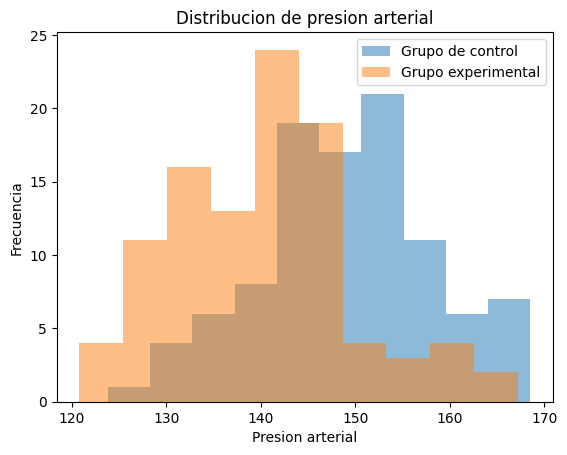

In [86]:
plt.hist(control_group, alpha=0.5, label='Grupo de control')
plt.hist(experimental_group, alpha=0.5, label='Grupo experimental')
plt.legend(loc='upper right')
plt.xlabel('Presion arterial')
plt.ylabel('Frecuencia')
plt.title('Distribucion de presion arterial')
plt.show()

* Boxplot comparativo

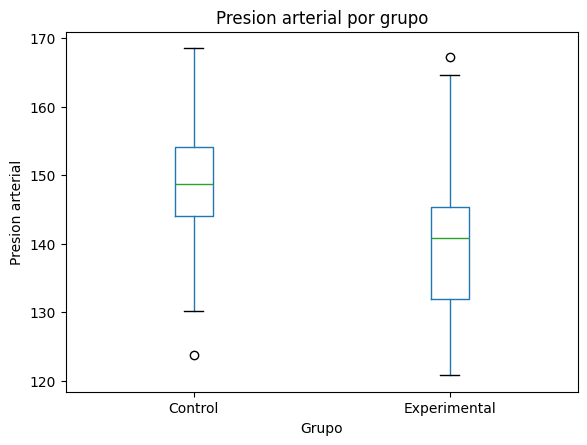

In [87]:
data.boxplot(by='Grupo', column='Presion_arterial', grid=False)
plt.xlabel('Grupo')
plt.ylabel('Presion arterial')
plt.title('Presion arterial por grupo')
plt.suptitle('')
plt.show()